In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py

In [3]:
#import game
!pip install gym==0.23.1
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
#game setup
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

/Users/krisshbhargava/anaconda3/lib/python3.11/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3` with the environment ID `SuperMarioBros-v3`.
  logger.warn(


In [4]:
done = True
for step in range(100000):
    if done:
        observation = env.reset()
    observation, reward, done, info = env.step(env.action_space.sample())
    done = bool(done)  # Cast numpy.bool_ to a regular bool
    env.render()
env.close()

/Users/krisshbhargava/anaconda3/lib/python3.11/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [6]:
!pip install torch torchvision torchaudio

In [7]:
!pip install 'stable-baselines3[extra]'

In [1]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [4]:
#create base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
#simplify controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
#grayscale environment
env = GrayScaleObservation(env, keep_dim=True)
#wrap inside dummy environment
env = DummyVecEnv([lambda: env])
#stack frames
env = VecFrameStack(env, 4, channels_order='last')

/Users/krisshbhargava/anaconda3/lib/python3.11/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3` with the environment ID `SuperMarioBros-v3`.
  logger.warn(
/Users/krisshbhargava/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


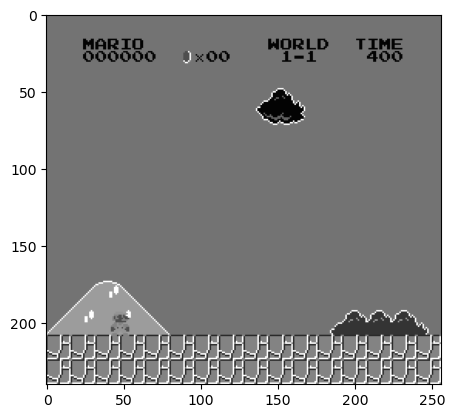

In [5]:
state = env.reset()
plt.imshow(state[0])

In [6]:
#importing os for file management
import os
#PPO for algorithms
from stable_baselines3 import PPO
#Base callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [12]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_call))
            self.mode.save(model_path)
        
        return True

In [13]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [15]:
#sets up model saving callback
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [17]:
#model for mario AI
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [18]:
#train AI model, this is where the model learns w/hundred-thousand frames
n = 100000
model.learn(total_timesteps=n, callback=callback)

Logging to ./logs/PPO_1


AttributeError: 'TrainAndLoggingCallback' object has no attribute 'n_calls'